In [ ]:
import pandas as pd
from numpy import random

SEED = 1234
random.seed(SEED)

livros = pd.read_csv("Books.csv")
notas = pd.read_csv("Ratings.csv")

C:\Users\felip\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3417: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Dados dos livros

In [ ]:
livros.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
livros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
livros_sem_fotos = livros.drop(columns = ['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis = 1)

livros_sem_fotos.columns = ['ISBN', 'titulo_do_livro', 'autor', 'ano_publicacao', 'editora']

### Dados das notas

In [ ]:
notas.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
notas.columns = ['usuarioid', 'ISBN', 'avaliacao_livro']

## Criando DataFrame

In [ ]:
livros_sem_fotos.set_index("ISBN", inplace = True)
notas.set_index("ISBN", inplace = True)

In [ ]:
notas_de_cada_usuario = livros_sem_fotos.join(notas)
notas_de_cada_usuario.head()

,titulo_do_livro,autor,ano_publicacao,editora,usuarioid,avaliacao_livro
ISBN,,,,,,
0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,171118.0,8.0
0001010565,Mog's Christmas,Judith Kerr,1992,Collins,86123.0,0.0
0001010565,Mog's Christmas,Judith Kerr,1992,Collins,209516.0,0.0
0001046438,Liar,Stephen Fry,0,Harpercollins Uk,23902.0,9.0
0001046713,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,196149.0,0.0


In [ ]:
notas_de_cada_usuario.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1032345 entries, 0000913154 to B0002K6K8O
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   titulo_do_livro  1032345 non-null  object 
 1   autor            1032344 non-null  object 
 2   ano_publicacao   1032345 non-null  object 
 3   editora          1032343 non-null  object 
 4   usuarioid        1031136 non-null  float64
 5   avaliacao_livro  1031136 non-null  float64
dtypes: float64(2), object(4)
memory usage: 55.1+ MB


In [ ]:
notas_de_cada_usuario['avaliacao_livro'].value_counts()

0.0     647294
8.0      91804
10.0     71225
7.0      66402
9.0      60778
5.0      45355
6.0      31687
4.0       7617
3.0       5118
2.0       2375
1.0       1481
Name: avaliacao_livro, dtype: int64

In [ ]:
notas_de_cada_usuario = notas_de_cada_usuario[['usuarioid' ,'titulo_do_livro', 'avaliacao_livro']]
notas_de_cada_usuario.head()

,usuarioid,titulo_do_livro,avaliacao_livro
ISBN,,,
0000913154,171118.0,The Way Things Work: An Illustrated Encycloped...,8.0
0001010565,86123.0,Mog's Christmas,0.0
0001010565,209516.0,Mog's Christmas,0.0
0001046438,23902.0,Liar,9.0
0001046713,196149.0,Twopence to Cross the Mersey,0.0


In [ ]:
notas_de_cada_usuario.usuarioid = pd.to_numeric(notas_de_cada_usuario.usuarioid, downcast='integer')

In [ ]:
notas_de_cada_usuario.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1032345 entries, 0000913154 to B0002K6K8O
Data columns (total 3 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   usuarioid        1031136 non-null  float64
 1   titulo_do_livro  1032345 non-null  object 
 2   avaliacao_livro  1031136 non-null  float64
dtypes: float64(2), object(1)
memory usage: 31.5+ MB


### Filtrando dados nulos

In [ ]:
notas_de_cada_usuario.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1032345 entries, 0000913154 to B0002K6K8O
Data columns (total 3 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   usuarioid        1031136 non-null  float64
 1   titulo_do_livro  1032345 non-null  object 
 2   avaliacao_livro  1031136 non-null  float64
dtypes: float64(2), object(1)
memory usage: 31.5+ MB


In [ ]:
notas_de_cada_usuario[notas_de_cada_usuario.usuarioid.isnull()]

,usuarioid,titulo_do_livro,avaliacao_livro
ISBN,,,
0002253569,NaN,Information,NaN
0006377211,NaN,A Sparrow's Flight: A Memoir,NaN
0006470599,NaN,The Road to Rowanbrae,NaN
0006752586,NaN,Guinea Pigs on the Go (Collins Yellow Storybooks),NaN
000675368X,NaN,"The Lion, the Witch and the Wardrobe",NaN
...,...,...,...
9836247416,NaN,Institusi pentadbiran undang-undang &amp; keha...,NaN
9871138261,NaN,Navegaciones y Regresos,NaN
9875451495,NaN,Los Mitos de La Historia Argentina,NaN


In [ ]:
notas_de_cada_usuario.dropna(subset = ['usuarioid'] ,inplace = True)
notas_de_cada_usuario.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1031136 entries, 0000913154 to B0002K6K8O
Data columns (total 3 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   usuarioid        1031136 non-null  float64
 1   titulo_do_livro  1031136 non-null  object 
 2   avaliacao_livro  1031136 non-null  float64
dtypes: float64(2), object(1)
memory usage: 31.5+ MB


### Visualizando quantidade de notas

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
notas_de_cada_usuario['avaliacao_livro'].value_counts()

0.0     647294
8.0      91804
10.0     71225
7.0      66402
9.0      60778
5.0      45355
6.0      31687
4.0       7617
3.0       5118
2.0       2375
1.0       1481
Name: avaliacao_livro, dtype: int64

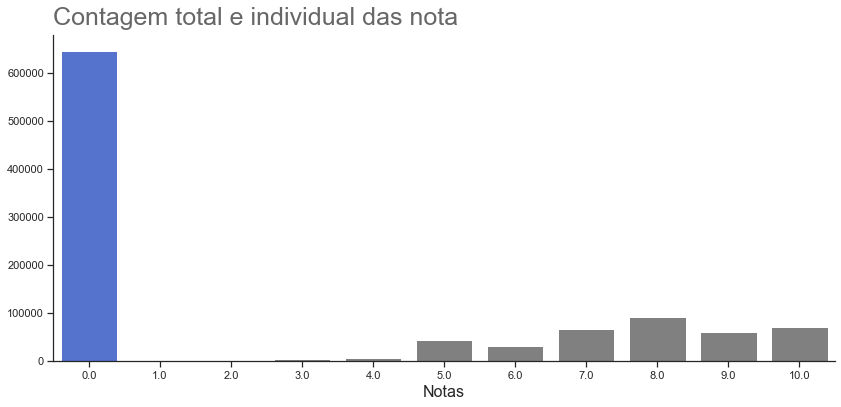

In [ ]:
eixo_x = notas_de_cada_usuario['avaliacao_livro'].value_counts().index
eixo_y = notas_de_cada_usuario['avaliacao_livro'].value_counts().values

cores = ['royalblue', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']
sns.set(rc={'figure.figsize':(14,6), 'font.size' : 15}, font_scale = 1)
sns.set_style("ticks")

grafico_notas = sns.barplot(x = eixo_x, y = eixo_y, palette = cores)

grafico_notas.set_xlabel('Notas', fontsize = 16)
grafico_notas.set_title("Contagem total e individual das nota", fontsize = 25, pad =10, loc = 'left', alpha = 0.7)

sns.despine()
plt.show()

### Retrinado livros com notas zeros

In [ ]:
aparicoes_do_livro = notas_de_cada_usuario['titulo_do_livro'].value_counts()
aparicoes_do_livro = aparicoes_do_livro.to_frame()
aparicoes_do_livro.columns = ['numero_de_avaliacoes']
aparicoes_do_livro.index.name = 'titulo_do_livro'
aparicoes_do_livro.head()

,numero_de_avaliacoes
titulo_do_livro,
Wild Animus,2502
The Lovely Bones: A Novel,1295
The Da Vinci Code,898
A Painted House,838
The Nanny Diaries: A Novel,828


In [ ]:
notas_de_cada_usuario = notas_de_cada_usuario.reset_index()
notas_de_cada_usuario = notas_de_cada_usuario.set_index('titulo_do_livro')
notas_de_cada_usuario = notas_de_cada_usuario.join(aparicoes_do_livro)

In [ ]:
notas_de_cada_usuario.describe()

,usuarioid,avaliacao_livro,numero_de_avaliacoes
count,1.031136e+06,1.031136e+06,1.031136e+06
mean,1.405945e+05,2.839051e+00,6.978162e+01
std,8.052466e+04,3.854157e+00,1.753381e+02
min,2.000000e+00,0.000000e+00,1.000000e+00
25%,7.041500e+04,0.000000e+00,3.000000e+00
50%,1.412100e+05,0.000000e+00,1.300000e+01
75%,2.114260e+05,7.000000e+00,6.100000e+01
max,2.788540e+05,1.000000e+01,2.502000e+03


In [ ]:
livros_para_deletar =(notas_de_cada_usuario['avaliacao_livro'] == 0)
livros_para_deletar

titulo_do_livro
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)     True
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)     True
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)     True
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    False
 Always Have Popsicles                                                                                         True
                                                                                                              ...  
Ã?Â?stlich der Berge.                                                                                         False
Ã?Â?stlich der Berge.                                                                                          True
Ã?Â?stlich der Berge.                                   

In [ ]:
notas_de_cada_usuario = notas_de_cada_usuario[~livros_para_deletar]

In [ ]:
notas_de_cada_usuario.reset_index(inplace = True)

In [ ]:
notas_de_cada_usuario.describe()

,usuarioid,avaliacao_livro,numero_de_avaliacoes
count,383842.000000,383842.000000,383842.000000
mean,136031.461260,7.626701,75.141412
std,80482.299401,1.841339,169.297214
min,8.000000,1.000000,1.000000
25%,67591.000000,7.000000,3.000000
50%,133789.000000,8.000000,14.000000
75%,206219.000000,9.000000,69.000000
max,278854.000000,10.000000,2502.000000


#### Visualizando quantidade de notas novamente

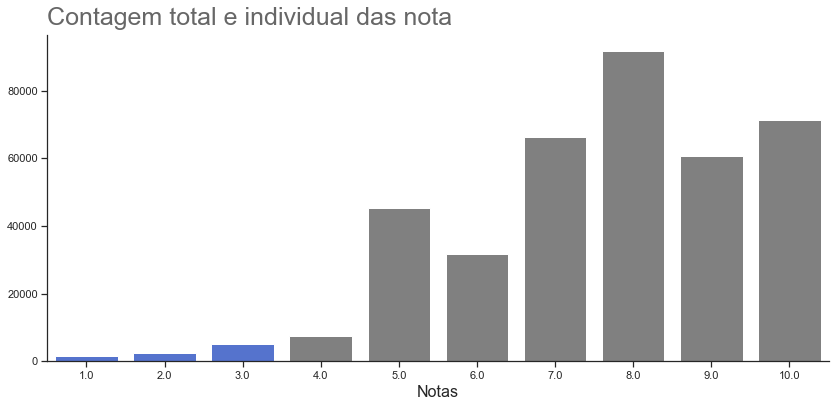

In [ ]:
eixo_x = notas_de_cada_usuario['avaliacao_livro'].value_counts().index
eixo_y = notas_de_cada_usuario['avaliacao_livro'].value_counts().values

sns.set(rc={'figure.figsize':(14,6), 'font.size' : 15}, font_scale = 1)
sns.set_style("ticks")

cores = ['royalblue', 'royalblue', 'royalblue', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']

grafico_notas = sns.barplot(x = eixo_x, y = eixo_y, palette = cores)

grafico_notas.set_xlabel('Notas', fontsize = 16)
grafico_notas.set_title("Contagem total e individual das nota", fontsize = 25, pad =10, loc = 'left', alpha = 0.7)

sns.despine()
plt.show()

## Identificação de outliers

In [ ]:
notas_de_cada_usuario['avaliacao_livro'].value_counts().values

array([91804, 71225, 66402, 60778, 45355, 31687,  7617,  5118,  2375,
        1481], dtype=int64)

In [ ]:
notas_de_cada_usuario['avaliacao_livro'].value_counts().index

Float64Index([8.0, 10.0, 7.0, 9.0, 5.0, 6.0, 4.0, 3.0, 2.0, 1.0], dtype='float64')

C:\Users\felip\anaconda3\envs\felipe-pandas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


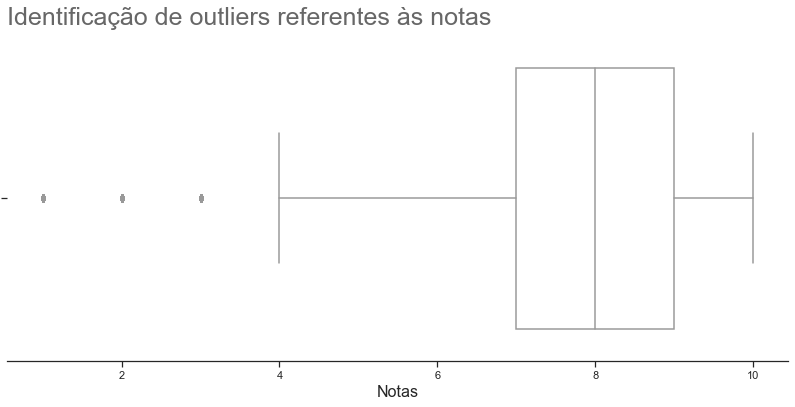

In [ ]:
sns.set(rc={'figure.figsize':(14,6), 'font.size' : 15}, font_scale = 1)
sns.set_style("ticks")

grafico_notas = sns.boxplot(notas_de_cada_usuario['avaliacao_livro'], color = 'white')

grafico_notas.set_xlabel('Notas', fontsize = 16)
grafico_notas.set_title("Identificação de outliers referentes às notas", fontsize = 25, pad =10, loc = 'left', alpha = 0.7)

sns.despine(left = True)
plt.show()

In [ ]:
primeiro_quartil = notas_de_cada_usuario['avaliacao_livro'].quantile(0.25)
terceiro_quartil = notas_de_cada_usuario['avaliacao_livro'].quantile(0.75)
intervalo = terceiro_quartil - primeiro_quartil
limite_inferior = primeiro_quartil - 1.5 * intervalo
limite_superior = primeiro_quartil + 1.5 * intervalo

In [ ]:
limite_superior

10.0

In [ ]:
limite_inferior

4.0

In [ ]:
notas_de_cada_usuario = notas_de_cada_usuario.query('avaliacao_livro >= @limite_inferior')

In [ ]:
notas_de_cada_usuario.head()

,titulo_do_livro,ISBN,usuarioid,avaliacao_livro,numero_de_avaliacoes
0,A Light in the Storm: The Civil War Diary of ...,0590567330,96448.0,9.0,4
1,"Ask Lily (Young Women of Faith: Lily Series, ...",0310232546,269557.0,8.0,1
2,Dark Justice,0399151788,98391.0,10.0,1
3,Earth Prayers From around the World: 365 Pray...,006250746X,26544.0,9.0,10
4,Earth Prayers From around the World: 365 Pray...,006250746X,69120.0,10.0,10


C:\Users\felip\anaconda3\envs\felipe-pandas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


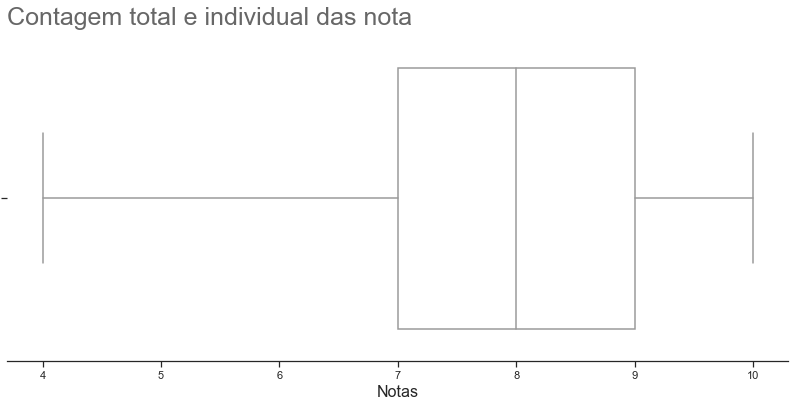

In [ ]:
sns.set(rc={'figure.figsize':(14,6), 'font.size' : 15}, font_scale = 1)
sns.set_style("ticks")

grafico_notas = sns.boxplot(notas_de_cada_usuario['avaliacao_livro'], color = 'white')

grafico_notas.set_xlabel('Notas', fontsize = 16)
grafico_notas.set_title("Contagem total e individual das nota", fontsize = 25, pad =10, loc = 'left', alpha = 0.7)

sns.despine(left = True)
plt.show()

### Visualizando notas

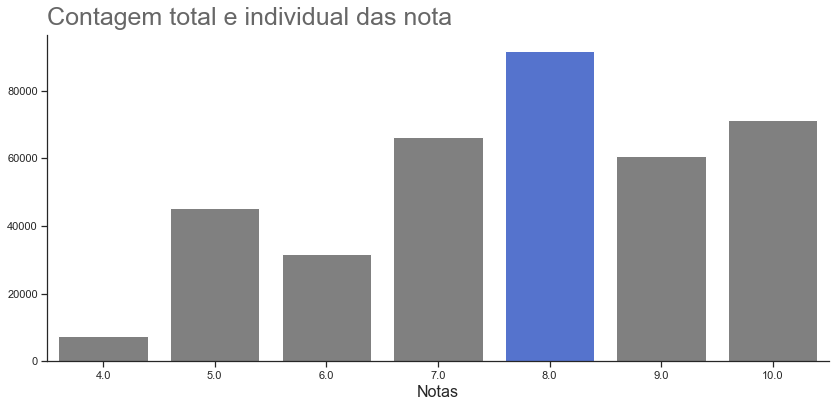

In [ ]:
eixo_x = notas_de_cada_usuario['avaliacao_livro'].value_counts().index
eixo_y = notas_de_cada_usuario['avaliacao_livro'].value_counts().values

sns.set(rc={'figure.figsize':(14,6), 'font.size' : 15}, font_scale = 1)
sns.set_style("ticks")

cores = ['grey', 'grey', 'grey', 'grey', 'royalblue', 'grey', 'grey']

grafico_notas = sns.barplot(x = eixo_x, y = eixo_y, palette = cores)

grafico_notas.set_xlabel('Notas', fontsize = 16)
grafico_notas.set_title("Contagem total e individual das nota", fontsize = 25, pad =10, loc = 'left', alpha = 0.7)

sns.despine()
plt.show()

In [ ]:
notas_de_cada_usuario.drop(columns = ['numero_de_avaliacoes'], axis = 1, inplace = True)

# DataFrame para o modelo

In [ ]:
notas_de_cada_usuario.columns

Index(['titulo_do_livro', 'ISBN', 'usuarioid', 'avaliacao_livro'], dtype='object')

In [ ]:
dados_para_modelo = notas_de_cada_usuario.drop(columns = ['ISBN'])
dados_para_modelo.usuarioid = pd.to_numeric(dados_para_modelo.usuarioid, downcast = 'integer')

In [ ]:
dados_para_modelo

,titulo_do_livro,usuarioid,avaliacao_livro
0,A Light in the Storm: The Civil War Diary of ...,96448,9.0
1,"Ask Lily (Young Women of Faith: Lily Series, ...",269557,8.0
2,Dark Justice,98391,10.0
3,Earth Prayers From around the World: 365 Pray...,26544,9.0
4,Earth Prayers From around the World: 365 Pray...,69120,10.0
...,...,...,...
383837,Ã?Â?rger mit Produkt X. Roman.,133567,8.0
383838,Ã?Â?rger mit Produkt X. Roman.,225343,7.0
383839,Ã?Â?sterlich leben.,256636,7.0
383840,Ã?Â?stlich der Berge.,90839,8.0


### Análises gráficas complementares prévias

#### Usuários que mais avaliaram livros

In [ ]:
dados_para_modelo.usuarioid.value_counts()[:10].index

Int64Index([11676, 98391, 189835, 153662, 23902, 235105, 76499, 171118, 16795,
            248718],
           dtype='int64')

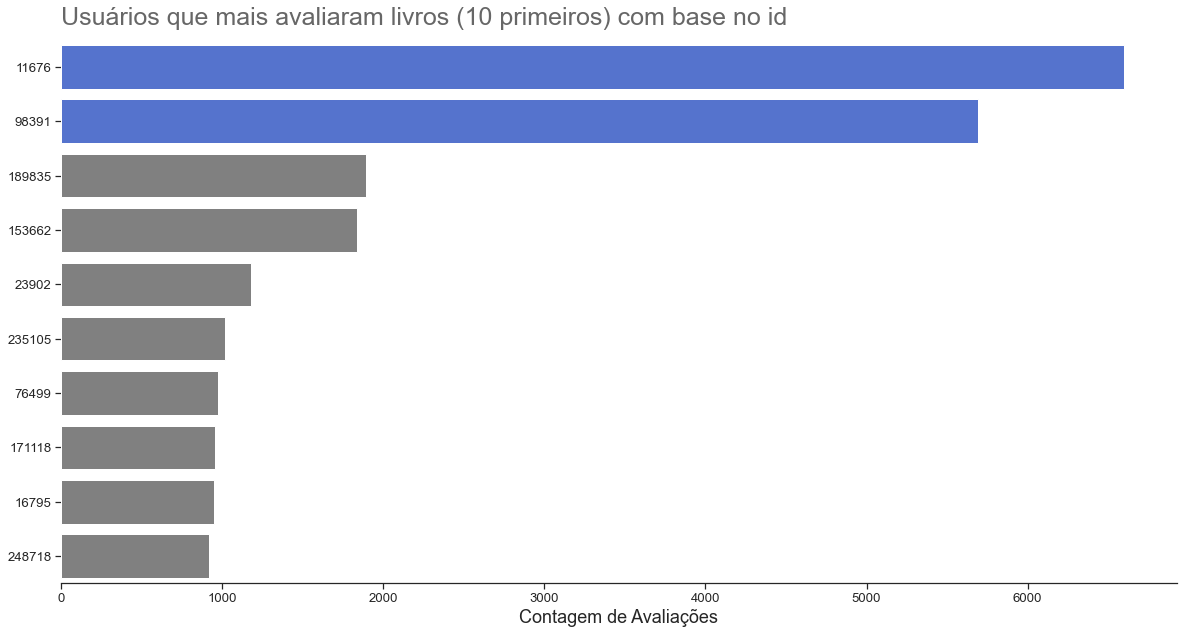

In [ ]:
eixo_x = dados_para_modelo.usuarioid.value_counts()[:10].values
eixo_y = dados_para_modelo.usuarioid.value_counts()[:10].index.astype('str')

sns.set(rc={'figure.figsize':(20,10), 'font.size' : 15}, font_scale = 1.2)
sns.set_style("ticks")

cores = ['royalblue', 'royalblue', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']

grafico_notas = sns.barplot(x = eixo_x, y = eixo_y, palette = cores)

grafico_notas.set_xlabel('Contagem de Avaliações', fontsize = 18)
grafico_notas.set_title("Usuários que mais avaliaram livros (10 primeiros) com base no id",
                        fontsize = 25, pad =15, loc = 'left', alpha = 0.7)

sns.despine(left = True)
plt.show()

#### Livros mais avaliados

In [ ]:
aparicoes_do_livro = notas_de_cada_usuario['titulo_do_livro'].value_counts()
aparicoes_do_livro = aparicoes_do_livro.to_frame()
aparicoes_do_livro.columns = ['numero_de_avaliacoes']
aparicoes_do_livro.index.name = 'titulo_do_livro'

notas_de_cada_usuario = notas_de_cada_usuario.reset_index()
notas_de_cada_usuario = notas_de_cada_usuario.set_index('titulo_do_livro')
notas_de_cada_usuario = notas_de_cada_usuario.join(aparicoes_do_livro)

In [ ]:
notas_de_cada_usuario.reset_index(inplace = True)

In [ ]:
nome_dos_livros = notas_de_cada_usuario.titulo_do_livro.value_counts().index
nome_dos_livros

Index(['The Lovely Bones: A Novel', 'The Da Vinci Code',
       'The Secret Life of Bees', 'The Nanny Diaries: A Novel',
       'The Red Tent (Bestselling Backlist)', 'Bridget Jones's Diary',
       'A Painted House', 'Wild Animus', 'Life of Pi',
       'Harry Potter and the Chamber of Secrets (Book 2)',
       ...
       'Journey Without Distance', 'Journey Within: A Tale of Astral Travel',
       'Journey With My Selves a Memoir 1909 1963', 'Journey To Desire',
       'Journey Through Llandor', 'Journey Through Britain',
       'Journey Into Power : How to Sculpt Your Ideal Body, Free your True Self and Transform your Life with Baptiste Power Vinyasa Yoga',
       'Journey Into Love (Superromance)', 'Journey Into Fear',
       'Ã?Â?thique en toc'],
      dtype='object', length=133311)

In [ ]:
livros_sem_dupli = notas_de_cada_usuario.drop_duplicates(subset = ['titulo_do_livro'])
livros_sem_dupli.head()

,titulo_do_livro,index,ISBN,usuarioid,avaliacao_livro,numero_de_avaliacoes
0,A Light in the Storm: The Civil War Diary of ...,0,0590567330,96448.0,9.0,1
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,0310232546,269557.0,8.0,1
2,Dark Justice,2,0399151788,98391.0,10.0,1
3,Earth Prayers From around the World: 365 Pray...,3,006250746X,26544.0,9.0,6
9,Final Fantasy Anthology: Official Strategy Gu...,10,1566869250,30072.0,10.0,2


In [ ]:
livros_sem_dupli.describe()

,index,usuarioid,avaliacao_livro,numero_de_avaliacoes
count,133311.000000,133311.000000,133311.000000,133311.000000
mean,187796.984292,114954.176212,7.659503,2.811981
std,109940.014151,81175.137478,1.728540,8.948255
min,0.000000,8.000000,4.000000,1.000000
25%,92953.500000,40922.000000,6.000000,1.000000
50%,182403.000000,98391.000000,8.000000,1.000000
75%,279253.000000,182085.000000,9.000000,2.000000
max,383841.000000,278854.000000,10.000000,696.000000


In [ ]:
media = livros_sem_dupli.numero_de_avaliacoes.mean()
livros_mais_avaliados = livros_sem_dupli[livros_sem_dupli.numero_de_avaliacoes >= media]

In [ ]:
livros_mais_avaliados = livros_mais_avaliados.sort_values(by = ['numero_de_avaliacoes'], ascending = False).head(10)
livros_mais_avaliados.head()

,titulo_do_livro,index,ISBN,usuarioid,avaliacao_livro,numero_de_avaliacoes
301841,The Lovely Bones: A Novel,308942,0316666343,277439.0,7.0,696
275177,The Da Vinci Code,281691,0385504209,276925.0,8.0,485
322332,The Secret Life of Bees,329861,0142001740,277803.0,8.0,404
307275,The Nanny Diaries: A Novel,314488,0312278586,453.0,6.0,384
317786,The Red Tent (Bestselling Backlist),325220,0312195516,277378.0,7.0,377


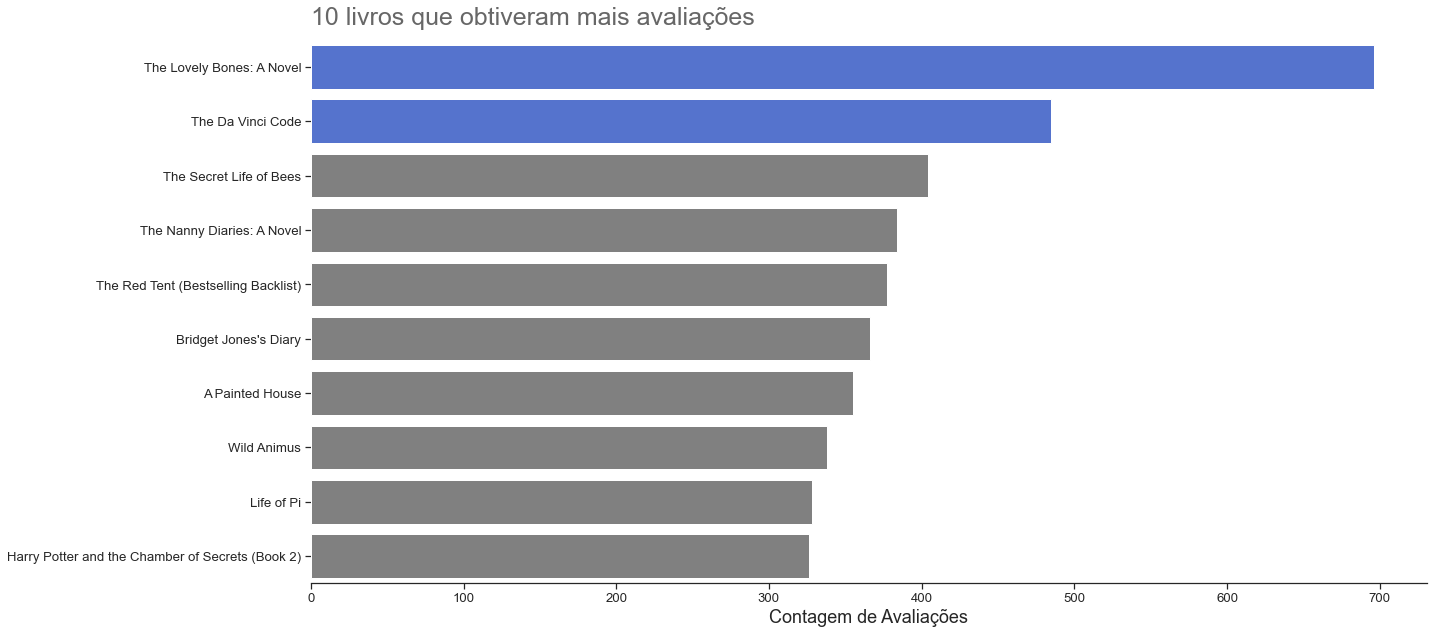

In [ ]:
eixo_x = livros_mais_avaliados.numero_de_avaliacoes
eixo_y = livros_mais_avaliados.titulo_do_livro

sns.set(rc={'figure.figsize':(20,10), 'font.size' : 15}, font_scale = 1.2)
sns.set_style("ticks")

cores = ['royalblue', 'royalblue', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']

grafico_notas = sns.barplot(x = eixo_x, y = eixo_y, palette = cores)

grafico_notas.set_xlabel('Contagem de Avaliações', fontsize = 18)
grafico_notas.set_title("10 livros que obtiveram mais avaliações",
                        fontsize = 25, pad =15, loc = 'left', alpha = 0.7)

grafico_notas.set_ylabel("")

sns.despine(left = True)
plt.show()

#### Salvando DataFrame

In [ ]:
dados_para_modelo.to_csv("dados_para_modelo.csv", sep = ';', index = False)

## Análises por país

- Quais países avaliam mais?
- De acordo com 3 países, qual a distribuição das notas?

###  Quais países avaliam mais?

In [ ]:
usuarios = pd.read_csv("Users.csv")
usuarios.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
usuarios.columns = ['usuarioid', 'localizacao', 'idade']
usuarios.set_index('usuarioid', inplace = True)

In [ ]:
notas_de_cada_usuario.set_index('usuarioid', inplace = True)
notas_de_cada_usuario.head()

,titulo_do_livro,index,ISBN,avaliacao_livro,numero_de_avaliacoes
usuarioid,,,,,
96448.0,A Light in the Storm: The Civil War Diary of ...,0,0590567330,9.0,1
269557.0,"Ask Lily (Young Women of Faith: Lily Series, ...",1,0310232546,8.0,1
98391.0,Dark Justice,2,0399151788,10.0,1
26544.0,Earth Prayers From around the World: 365 Pray...,3,006250746X,9.0,6
69120.0,Earth Prayers From around the World: 365 Pray...,4,006250746X,10.0,6


In [ ]:
notas_de_cada_usuario_com_loc = notas_de_cada_usuario.join(usuarios)

In [ ]:
notas_de_cada_usuario_com_loc.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 374868 entries, 8.0 to 278854.0
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   titulo_do_livro       374868 non-null  object 
 1   index                 374868 non-null  int64  
 2   ISBN                  374868 non-null  object 
 3   avaliacao_livro       374868 non-null  float64
 4   numero_de_avaliacoes  374868 non-null  int64  
 5   localizacao           374868 non-null  object 
 6   idade                 263842 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 22.9+ MB


In [ ]:
lista_de_locs = list(notas_de_cada_usuario_com_loc.localizacao.values)

In [ ]:
lista_de_locs[0].split(', ')[-1]

'canada'

In [ ]:
paises = list()

for item in lista_de_locs:
    pais = item.split(', ')[-1]
    if pais[-1] == '.' or pais.__contains__('u.s') or pais.__contains__('u'):
        if pais.__contains__('u.s') or pais == 'us':
            pais = 'usa'
        elif pais == 'far away...':
            pais = 'esconhecido'
    if pais.__contains__("united s"):
        pais = 'usa'
    if pais.__contains__("united k"):
        pais = 'u.k.'
    if pais[-1] == ',':
        pais = pais.split(',')[0]
    paises.append(pais)

In [ ]:
notas_de_cada_usuario_com_loc['pais'] = paises
notas_de_cada_usuario_com_loc.reset_index(inplace = True)

In [ ]:
num_ava_por_pais = notas_de_cada_usuario_com_loc.groupby('pais').sum()
num_ava_por_pais.reset_index(inplace = True)
num_ava_por_pais.drop(num_ava_por_pais.index[0], inplace = True)
num_ava_por_pais.sort_values(by = ['numero_de_avaliacoes'], ascending = False, inplace= True)

In [ ]:
num_ava_por_pais.head()

,pais,usuarioid,index,avaliacao_livro,numero_de_avaliacoes,idade
345,usa,3.552254e+10,49929341507,2003145.0,8918053,6898734.0
59,canada,4.977418e+09,6823597507,265248.0,1053884,899387.0
336,u.k.,1.838244e+09,2786079456,112766.0,280859,410434.0
24,australia,1.036421e+09,1341000674,51739.0,163218,173927.0
113,germany,1.619127e+09,1832405724,88742.0,145179,262882.0


In [ ]:
num_ava_por_pais.pais.str.upper().head(3).values

array(['USA', 'CANADA', 'U.K.'], dtype=object)

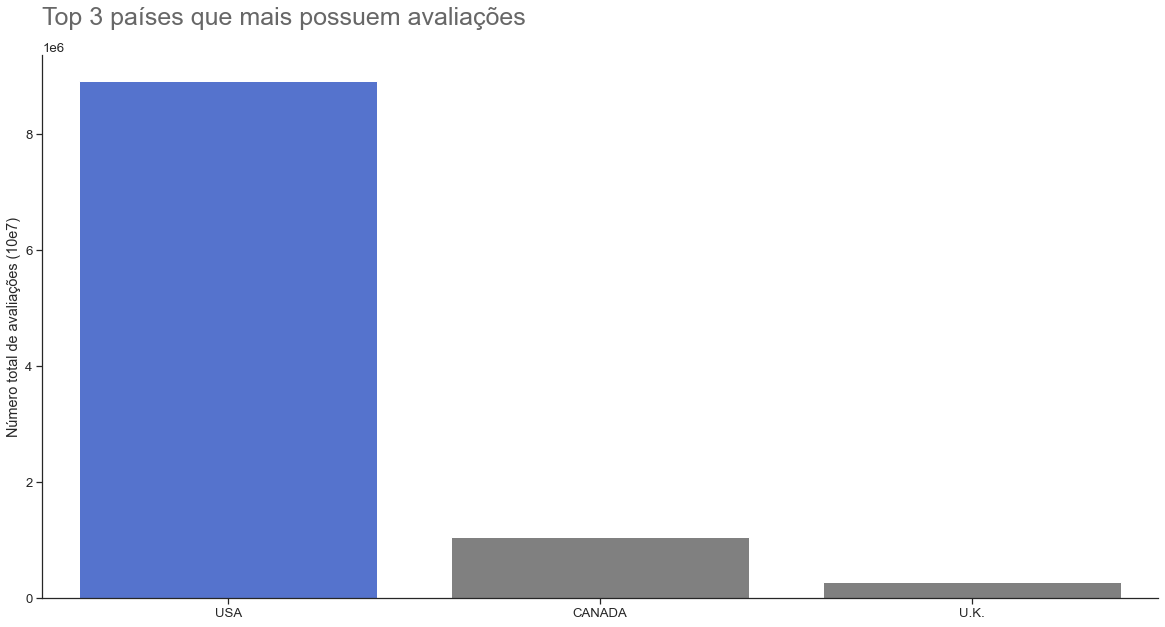

In [ ]:
sns.set(rc={'figure.figsize':(20,10), 'font.size' : 15}, font_scale = 1.2)
sns.set_style("ticks")

cores = ['royalblue', 'grey', 'grey']
grafico_notas = sns.barplot(x = num_ava_por_pais.pais.str.upper().head(3).values,
                            y = num_ava_por_pais['numero_de_avaliacoes'].head(3).values,
                            palette = cores)

grafico_notas.set_title("Top 3 países que mais possuem avaliações",
                        fontsize = 25, pad = 30, loc = 'left', alpha = 0.7)
grafico_notas.set_ylabel("Número total de avaliações (10e7)")
sns.despine()
plt.show()

### - De acordo com 3 países, qual a distribuição das notas?

In [ ]:
notas_de_cada_usuario_com_loc.head()

,usuarioid,titulo_do_livro,index,ISBN,avaliacao_livro,numero_de_avaliacoes,localizacao,idade,pais
0,8.0,Clara Callan,58612,0002005018,5.0,9,"timmins, ontario, canada",NaN,canada
1,8.0,Goodbye to the Buttermilk Sky,118747,1881320189,7.0,2,"timmins, ontario, canada",NaN,canada
2,8.0,Jane Doe,148143,1552041778,5.0,2,"timmins, ontario, canada",NaN,canada
3,8.0,More Cunning Than Man: A Social History of Rat...,185430,1575663937,6.0,1,"timmins, ontario, canada",NaN,canada
4,8.0,The Middle Stories,312281,0887841740,5.0,1,"timmins, ontario, canada",NaN,canada


In [ ]:
paises_maiores = num_ava_por_pais.pais.head(3).values
paises_maiores

array(['usa', 'canada', 'u.k.'], dtype=object)

In [ ]:
notas_por_pais = notas_de_cada_usuario_com_loc.query('pais in @paises_maiores')
notas_por_pais.query('pais == "usa"').groupby('avaliacao_livro').pais.count().values

array([ 4811, 32371, 20277, 43034, 61865, 42754, 51944], dtype=int64)

In [ ]:
notas_por_pais_maiores = pd.DataFrame(index = [4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])

for pais_ in paises_maiores:
    notas_por_pais = notas_de_cada_usuario_com_loc.query('pais == @pais_').groupby('avaliacao_livro').pais.count()
    notas_por_pais_maiores[pais_] = notas_por_pais.values

In [ ]:
notas_por_pais_maiores

,usa,canada,u.k.
4.0,4811,740,321
5.0,32371,4157,1355
6.0,20277,3219,1306
7.0,43034,6961,2779
8.0,61865,9051,3630
9.0,42754,5196,2272
10.0,51944,5429,2793


In [ ]:
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
def criar_grafico_notas(pais: str, titulo:str):
    notas = notas_por_pais_maiores.index
    sizes = list(notas_por_pais_maiores[pais].values)
    texto = ['4<br>Quantidade: 4811', '5<br>Quantidade: 32371', '6<br>Quantidade: 20277', '7<br>Quantidade: 43034',
                                      '8<br>Quantidade: 61865', '9<br>Quantidade: 42754', '10<br>Quantidade: 51944']
    cor = ["rgb(0, 139, 139)" for id in range(0, 7)]
    grafico = go.Figure(data=[go.Scatter(x = notas, y = notas_por_pais_maiores[pais], 
                             text = texto,
                             mode = 'markers',
                             marker = dict(
                                 color = cor,
                                 size = sizes,
                                 sizemode='area',
                                 sizeref=2.*max(sizes)/(50.**2)
                             )
    )])

    grafico.update_xaxes(showgrid=False)
    grafico.update_yaxes(showgrid=False)

    
 
    grafico.update_layout(
        template = 'plotly_white',
        autosize=False,
        width=700,
        height=500,
        title={
            'text': titulo,
            'y':0.85,
            'x':0.5,
            'xanchor': 'right',
            'yanchor': 'top'},
        yaxis_title="Quantiade total",
        xaxis_title="Notas"
    )

    grafico.show()

In [ ]:
criar_grafico_notas('usa', "Quantidade total de notas (USA)")

In [ ]:
criar_grafico_notas('canada', "Quantidade total de notas (Canadá)")

In [ ]:
criar_grafico_notas('u.k.', "Quantidade total de notas (UK)")

## De acordo com os avaliadores dos EUA, qual a idade que predomina?

OBS: essa análise será feita com base nos dados disponíveis. Existem muitos usuários com as idades faltantes.

In [ ]:
notas_e_idades = notas_de_cada_usuario_com_loc.dropna()
notas_e_idades = notas_e_idades[['usuarioid', 'pais', 'idade', 'avaliacao_livro']]
notas_e_idades.reset_index(inplace = True, drop = True)
notas_e_idades.head()

,usuarioid,pais,idade,avaliacao_livro
0,19.0,,14.0,7.0
1,42.0,usa,17.0,7.0
2,44.0,usa,51.0,8.0
3,51.0,usa,34.0,9.0
4,56.0,usa,24.0,9.0


In [ ]:
notas_e_idades.usuarioid = pd.to_numeric(notas_e_idades.usuarioid, downcast = 'integer')
notas_e_idades.idade = pd.to_numeric(notas_e_idades.idade, downcast = 'integer')
notas_e_idades.describe()

,usuarioid,idade,avaliacao_livro
count,263842.000000,263842.000000,263842.000000
mean,138163.260474,36.878037,7.852533
std,78836.661597,13.751837,1.649459
min,19.000000,0.000000,4.000000
25%,72282.000000,28.000000,7.000000
50%,135265.000000,35.000000,8.000000
75%,206563.000000,45.000000,9.000000
max,278852.000000,244.000000,10.000000


In [ ]:
for idade in notas_e_idades.query("idade <= 5").idade.values:
    notas_e_idades.idade.replace({idade: 12}, inplace = True)

In [ ]:
for idade in notas_e_idades.query("idade >= 90").idade.values:
    notas_e_idades.idade.replace({idade: 39}, inplace = True)

In [ ]:
notas_e_idades_usa = notas_e_idades.query("pais == 'usa'")
notas_e_idades_usa.head()

,usuarioid,pais,idade,avaliacao_livro
1,42,usa,17,7.0
2,44,usa,51,8.0
3,51,usa,34,9.0
4,56,usa,24,9.0
5,56,usa,24,7.0


In [ ]:
notas_e_idades_canada = notas_e_idades.query("pais == 'canada'")
notas_e_idades_canada.head()

,usuarioid,pais,idade,avaliacao_livro
46,202,canada,28,6.0
48,215,canada,20,6.0
152,362,canada,63,7.0
215,475,canada,34,10.0
266,620,canada,45,7.0


In [ ]:
notas_e_idades_uk = notas_e_idades.query("pais == 'u.k.'")
notas_e_idades_uk.head()

,usuarioid,pais,idade,avaliacao_livro
11,85,u.k.,41,5.0
37,176,u.k.,34,4.0
189,393,u.k.,24,6.0
190,393,u.k.,24,6.0
431,713,u.k.,49,10.0


In [ ]:
idades_eua = notas_e_idades_usa.idade.sort_values().unique()
total_eua = notas_e_idades_usa.idade.value_counts().sort_values()

idades_canada = notas_e_idades_canada.idade.sort_values().unique()
total_canada = notas_e_idades_canada.idade.value_counts().sort_values()

idades_uk = notas_e_idades_uk.idade.sort_values().unique()
total_uk = notas_e_idades_uk.idade.value_counts().sort_values()

In [ ]:
grafico = go.Figure(data=[go.Bar(name = 'EUA', x = idades_eua, y = total_eua, marker_color = "rgb(0, 139, 139)"),
                         go.Bar(name = 'Canadá', x = idades_canada, y = total_canada, marker_color = "rgb(250, 215, 35)"),
                         go.Bar(name = 'UK', x = idades_uk, y = total_uk, marker_color = "rgb(250, 85, 206)")])

grafico.update_xaxes(showgrid=False)
grafico.update_yaxes(showgrid=False)

grafico.update_layout(
    barmode='stack',
    template = 'plotly_white',
    autosize=False,
    width=1000,
    height=500,
    title={
        'text': 'Distribuição das idades dos usuários por país (USA, Canadá e UK)',
        'y':0.85,
        'x':0.6,
        'xanchor': 'right',
        'yanchor': 'top'},
    yaxis_title="Quantiade total",
    xaxis_title="Idades"
)

grafico.show()

In [ ]:
grafico = go.Figure(data=[go.Bar(name = 'Canadá', x = idades_canada, y = total_canada, marker_color = "rgb(250, 215, 35)"),
                         go.Bar(name = 'UK', x = idades_uk, y = total_uk, marker_color = "rgb(250, 85, 206)")])

grafico.update_xaxes(showgrid=False)
grafico.update_yaxes(showgrid=False)

grafico.update_layout(
    barmode='stack',
    template = 'plotly_white',
    autosize=False,
    width=1000,
    height=500,
    title={
        'text': 'Distribuição das idades dos usuários do Canadá e UK',
        'y':0.85,
        'x':0.5,
        'xanchor': 'right',
        'yanchor': 'top'},
    yaxis_title="Quantiade total",
    xaxis_title="Idades"
)

grafico.show()